**Download** (right-click, save target as ...) this page as a Jupyterlab notebook from: [EX-1](http://54.243.252.9/ce-3354-webroot/4-Exams/EX1/EX1.ipynb)

___

# <font color=darkblue>CE 3354 Engineering Hydrology <br> Fall 2022 Exam 1 </font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Demonstrate ability to apply hydrologic and problem solving principles with respect to water balance, watershed delineation and measurements, and precipitation and streamflow.


---

### Problem 1 Water Budget Concepts

A river reach has an initial inflow of 350 cfs and an initial outflow of 285 cfs.  90 minutes later the inflow and outflow are 250 cfs and 200 cfs, respectively, and the volume in storage is 10.8 acre-ft. Determine:

1. The change in storage over the 90 minute interval, and
2. The initial storage volume

In [21]:
# solution here - use lesson02 script
# prototype function
def newS(t0,t1,I0,I1,O0,O1,S0):
    Ibar = 0.5*(I0 + I1)
    Obar = 0.5*(O0 + O1)
    dsdt = Ibar - Obar
    dsdt = dsdt*3600/43560 # convert to correct units
    deltat = t1-t0
    DS   = dsdt*deltat
    newS   = S0+DS
    return(newS)
# input values
t0 = 0 # hrs
t1 = 1.5 # hrs
I0 = 350 # cfs
I1 = 250 # cfs
O0 = 285 # cfs
O1 = 200 # cfs
S0 = 3.67 # acre-ft <<< Change this until storage out is 10.8
# echo inputs
print("Begin Time",t0," hours")
print("End Time",t1," hours")
print("Inflow at Begin Time",I0," cfs")
print("Inflow at End Time",I1," cfs")
print("Outflow at Begin Time",O0," cfs")
print("Outflow at End Time",O1," cfs")
print("Storage at Begin Time",S0," acre-feet")
S1   = newS(t0,t1,I0,I1,O0,O1,S0) # get new storage
# output results
print("Storage at End Time",round(S1,2)," acre-feet")

Begin Time 0  hours
End Time 1.5  hours
Inflow at Begin Time 350  cfs
Inflow at End Time 250  cfs
Outflow at Begin Time 285  cfs
Outflow at End Time 200  cfs
Storage at Begin Time 3.67  acre-feet
Storage at End Time 10.8  acre-feet


---

### Problem 2 Volume and Flow Concepts

1. If water flows past an observation location at 1.0 cubic feet per second, for one hour, what incremental volume in cubic feet has passed the observation location?
2. If a basin has a surface area of 1 acre, and water is uniformily ponded at a depth of 1 foot, what is the total volume of water in cubic feet?
3. A reservoir with a constant surface area of 500 acres has an evaporation rate of 3.6 inches per day. The average outflow from the reservoir is 50 cubic feet per second, what is the change in water level in one day?

In [24]:
# solution here
flowrate = 1.0 #cfs
duration = 1.0 #hour
totalvolume = flowrate*duration*(3600/1) # convert hour to seconds - totalvolume is in ft^3
print("Volume past observation point in 1 hour is ",round(totalvolume,3)," cubic feet")
area = 1 #acre
depth = 1 #foot
storedvolume = area*depth*(43560/1) #convert acre to sq. feet for volume in cubic feet
print("Volume in Basin is ",round(storedvolume,3)," cubic feet")
area = 500 #acres
evap = 3.6 #inches/day
loss = area*evap*(1/12)*(43560/1) # convert inches to feet, acres to sq. feet - result is in cubic feet per day 
flowrate = 50.0 #cfs
duration = 24.0 #hour
totalflow = flowrate*duration*(3600/1) # convert hour to seconds - totalvolume is in ft^3/day
deltah = (loss + totalflow)/(area*(43560/1))
print("Daily Water Level Change is ",round(deltah,3)," feet")

Volume past observation point in 1 hour is  3600.0  cubic feet
Volume in Basin is  43560.0  cubic feet
Daily Water Level Change is  0.498  feet


---

### Problem 3. Watershed Metrics

Figure 1 is a topographic map of a small drainage basin. The drawn contour interval is
20 feet. Many of the contours are labeled. A culvert structure is located on the Eastern
portion of the basin, near the outlet shown on Figure 3. 
<figure align="center">
<!--<img src="./topoMap.png" width="500" > -->
<img src="http://54.243.252.9/ce-3354-webroot/4-Exams/EX1/topoMap.png" width="700" >
<figcaption>Figure 1. Topographic Map of a portion of the Earth. Elevations and linear distances are in
f eet. North (by convention) is up. </figcaption>
</figure>

The red line is a highway alignment, beneath which the culvert structure is placed. Figure 2 is a photograph
of the culvert system that is comprised of 4-parallel , 4-foot diameter, 100-foot long
culverts. The lowest portion of the road near the culverts is at elevation 595 feet. The
culverts are laid on a dimensionless slope of 0.02.
<figure align="center">
<!--<img src="./culvert-system.png" width="600" > -->
<img src="http://54.243.252.9/ce-3354-webroot/4-Exams/EX1/culvert-system.png" width="600" >
<figcaption>Figure 2. Multiple-barrel outlet structure </figcaption>
</figure>

The watershed is delineated and the boundary is already drawn on the map.

The water surface area when the culvert system (like a dam, with 4 holes in the wall) impounds water to a water surface elevation of $565~feet$ is zero. (Zero pool area when the WSE is at 565 feet).  Figure 3 is a schematic sketch (elevation view) of a culvert barrel.

<figure align="center">
<!-- <img src="./CulvertSystemElevation.png" width="600" > -->
<img src="http://54.243.252.9/ce-3354-webroot/4-Exams/EX1/CulvertSystemElevation.png" width="700" >
<figcaption>Figure 3. Culvert system elevation view sketch </figcaption>
</figure>
   

In [25]:
# solution below:

- Estimate the basin drainage area that drains to the culvert structure.  Report the results in
  1. Square feet,
  2. Acres, and
  3. Square miles
  
  Superimpose a grid and apply counting squares (or use software and determine distances and areas  using measuring tools.)
  
  ![](topogrid.png)

In [26]:
# area
areasquare = 443556 #ft^2 interpreted from the scane in feet on the drawing
howmanysquares = 200

areaft2 = howmanysquares*areasquare

areaAc = areaft2*(1/43560) # 43560 ft^2 per acre

areaSqMi = areaAc*(1/640) # 640 acres per sq.mi.

print("Area in sq. feet : ",round(areaft2,3)," ft^2")
print("Area in acres : ",round(areaAc,3)," acres")
print("Area in sq. miles : ",round(areaSqMi,3)," sq.mi")

Area in sq. feet :  88711200  ft^2
Area in acres :  2036.529  acres
Area in sq. miles :  3.182  sq.mi


<font color="red"> Numerical answers +/- 10% are "correct" </font>

- Complete the elevation (side) view sketch of the road embankment and culvert system by indicating the missing elevations on the sketch of (show computations for the outlet elevation)
  1. The roadway crest in feet, 
  2. The culvert outlet elevation in feet, and
  3. The culvert barrel length in feet.
  
![](culvert-drawing-numbers.png)

<font color="red"> The "aside" balloon is FYI only , not part of an answer </font>

- Estimate the water surface area (area of the pool on the upstream side of the road embankment) when the embankment impounds water to a water surface elevation of $590~feet$.  Show how you made the estimate.

![](poolarea590.png)

In [27]:
poolarea590 = (areasquare*29)*(1/43560)
print("590 Elevation Pool Area in acres : ",round(poolarea590,3)," acres")

590 Elevation Pool Area in acres :  295.297  acres


- Estimate the main channel length in feet. Show how you made the estimate.

The main channel traverses about 24 squares, each square has a side of 666 feet.

In [28]:
lengthsquare = areasquare**(0.5)  # square root should give us the side
chanellength = 24 * lengthsquare # one could get fancy and use the diagional, which would be 1.4 larger
print("Main channel length in feet : ",round(chanellength,3)," feet")

Main channel length in feet :  15984.0  feet


- Estimate the elevation at the most upstream portion of the main channel (where the main channel would intersect the watershed boundary), in feet.

In [29]:
highpoint = 650 # feet

- Estimate the elevation of the outlet point of the watershed (the culvert invert elevations).

In [30]:
outlet = 565 #feet

- Using these two elevation values, estimate the average watershed slope along the main channel.   Express the result in
   1. Dimensionless slope, and 
   2. Percent slope.

In [31]:
slopedim = (highpoint-outlet)/chanellength
slopepercent = slopedim*100
print("Dimensionless main channel slope : ",round(slopedim,4)," --- ")
print("Percent main channel slope  : ",round(slopepercent,2)," percent")

Dimensionless main channel slope :  0.0053  --- 
Percent main channel slope  :  0.53  percent


---

### Problem 4. Rainfall and Runoff Data Reduction

A tabulation of an observed storm and associated runoff for the drainage area depicted by the map in Figure 1 is listed below.  The runoff was measured at the culvert system and indicated by the blue circle on the map.

|Time (hrs)|Accumulated Rain (inches)|Observed Discharge (cfs)|Incremental Volume (ft$^3$)|Cumulative Volume (ft$^3$)|
|---:|---:|---:|---:|---:|
| 0|0.000|0.00|||
|1|0.000|0.00|||
|2|0.000|0.00|||
|3|0.000|0.00|||
|4|0.000|0.00|||
|5|0.000|0.00|||
|6|0.000|0.00|||
|7|0.000|0.00|||
|8|0.101|1.40|||
|9|0.106|0.31|||
|10|0.111|0.31|||
|11|0.115|0.31|||
|12|0.120|0.31|||
|13|0.120|0.40|||
|14|0.150|0.40|||
|15|0.750|24.66|||
|16|2.750|588.23|||
|17|2.940|808.70|||
|18|3.030|154.28|||
|19|3.030|94.68|||
|20|3.030|27.56|||
|21|3.090|36.13|||
|22|3.210|19.65|||
|23|3.300|7.00|||
|24|3.300|0.00|||



Build a Jupyter Notebook (or use Excel) to:

1. Complete the column labeled Incremental Volume (ft$^3$). 
2. Complete the column labeled Cumulative Volume (ft$^3$).
3. Determine the total **volume** of runoff in cubic feet from the storm (e.g. the Cumulative Volume at hour 24) 
4. Convert the runoff volume from cubic feet into watershed feet (i.e divide by the watershed area), then from watershed feet into watershed inches.  
5. Determine the fraction (percent) of rainfall that becomes runoff.
6. Plot the cumulative precipitation in inches and the cumulative runoff in watershed inches on the same plot.  Use the time for the x-axis, and the respective cumulative depths for the y-axis.  Plot precipitation in BLUE and runoff in RED.

Total Runoff Volume 6351588.0  cubic feet
Total Runoff Volume 0.072  watershed feet
Total Runoff Volume 0.859  watershed inches

Total Precipitation Volume 24395580.0 cubic feet
Fraction of Rain that appears as runoff 26.0  percent


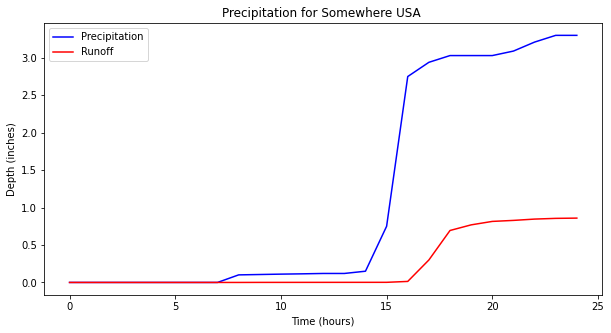

In [65]:
# solution here
dataframe=[[0,0.000,0.00],[1,0.000,0.00],[2,0.000,0.00],[3,0.000,0.00],[4,0.000,0.00],[5,0.000,0.00],[6,0.000,0.00],[7,0.000,0.00],[8,0.101,1.40],[9,0.106,0.31],[10,0.111,0.31],[11,0.115,0.31],[12,0.120,0.31],[13,0.120,0.40],[14,0.150,0.40],[15,0.750,24.66],[16,2.750,588.23],[17,2.940,808.70],[18,3.030,154.28],[19,3.030,94.68],[20,3.030,27.56],[21,3.090,36.13],[22,3.210,19.65],[23,3.300,7.00],[24,3.300,0.00]]
# set equivalents
time=[]
accrain=[]
obsflow=[]
for irow in range(len(dataframe)):
    time.append(dataframe[irow][0])
    accrain.append(dataframe[irow][1])
    obsflow.append(dataframe[irow][2])

incvol = [0 for i in range(len(time))]
accvol = [0 for i in range(len(time))]
accrun = [0 for i in range(len(time))]
for irow in range(1,len(dataframe)):
    incvol[irow]=obsflow[irow-1]*3600 # convert cfs to ft3 in 1 hour - increment from end of previous hour
    accvol[irow]=incvol[irow]+accvol[irow-1]
    

print("Total Runoff Volume",accvol[-1]," cubic feet")
print("Total Runoff Volume",round(accvol[-1]/areaft2,3)," watershed feet")
print("Total Runoff Volume",round(12*accvol[-1]/areaft2,3)," watershed inches")
print("\nTotal Precipitation Volume",round(accrain[-1]*areaft2/12,3),"cubic feet")
print("Fraction of Rain that appears as runoff",round(100*accvol[-1]/(accrain[-1]*areaft2/12),1)," percent")

#time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
increment=[0.121,0.121,0.132,0.154,0.165,0.187,0.198,0.242,0.297,0.374,0.594,4.708,1.199,0.528,0.374,0.286,0.253,0.209,0.176,0.154,0.132,0.132,0.132,0.132,0]
accumulate=[0 for i in range(len(time))]

for i in range(1,len(time)):
    accrun[i] = 12*accvol[i]/areaft2


import matplotlib.pyplot as plt # the python plotting library
plottitle ='Precipitation for Somewhere USA ' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, accrain, c='blue',drawstyle='default') # step plot
plt.plot(time, accrun, c='red',drawstyle='default') # step plot
plt.xlabel('Time (hours)')
plt.ylabel('Depth (inches)')
plt.legend(['Precipitation','Runoff'])
plt.title(plottitle)
plt.show()

